# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [120]:
# Import your libraries
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [68]:
# Your code here
sample1 = norm.rvs(loc = 50, scale = 5, size=10)
sample2 = norm.rvs(loc = 50, scale = 5, size=50)
sample3 = norm.rvs(loc = 50, scale = 5, size=500)
sample4 = norm.rvs(loc = 50, scale = 5, size=5000)
print("size=10-->", scipy.stats.normaltest(sample1))
print("size=50-->", scipy.stats.normaltest(sample2))
print("size=500-->", scipy.stats.normaltest(sample3))
print("size=5000-->", scipy.stats.normaltest(sample4))
# pvalue nos indica la concordancia entre las frecuencias esperadas y obtenidas.
# Cuanto más cerca estemos de 0, mayor será la concordancia 

size=10--> NormaltestResult(statistic=2.5885885013192205, pvalue=0.2740912357963974)
size=50--> NormaltestResult(statistic=0.7387179329870308, pvalue=0.6911772564373442)
size=500--> NormaltestResult(statistic=3.2407133252455598, pvalue=0.1978281286002297)
size=5000--> NormaltestResult(statistic=0.4604259256604326, pvalue=0.7943644143946715)


#### Interpret the normaltest results and make your observations.

In [80]:
# pvalor (hip nula: mis medidas se ditribuyen como una normal 
# alfa por convención 0.05:
# · Si pvalor < alfa se rechaza la hip nula y por tanto, mi distrib no es normal
# · Si pvalor > alfa se falla en el rechazo (aceptar hip nula) y la dist será normal.)
# Nuestro p > alfa la dist es normal.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

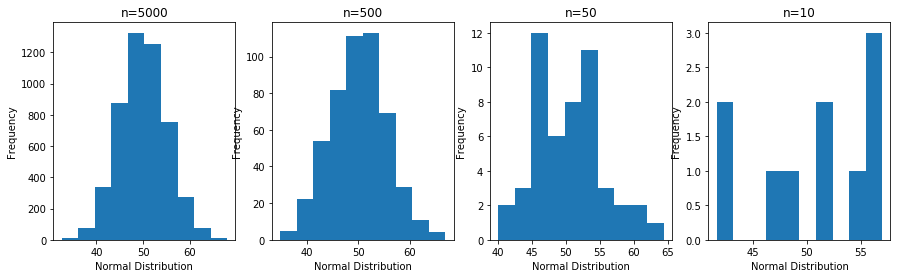

In [65]:
# Your code here
# Explain the test results here
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figwidth(15)
ax4.set_title('n=10')
ax4.hist(sample1)
ax4.set(xlabel='Normal Distribution', ylabel='Frequency')
ax3.set_title('n=50')
ax3.hist(sample2)
ax3.set(xlabel='Normal Distribution', ylabel='Frequency')
ax2.set_title('n=500')
ax2.hist(sample3)
ax2.set(xlabel='Normal Distribution', ylabel='Frequency')
ax1.set_title('n=5000')
ax1.hist(sample4)
ax1.set(xlabel='Normal Distribution', ylabel='Frequency')

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# Según vamos aumentando el tamaño de la muestra nos vamos acercando a la media de la distribución normal
# en nuestro caso 50.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

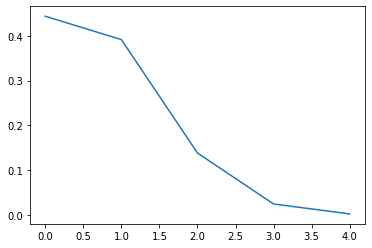

In [118]:
# Your code here
n = 5
p = 0.15
x= np.arange(n)
rv = binom(n, p)
plt.plot(x,rv.pmf(x))

#### Explain what you observe from the plot above

In [105]:
# Your comment here
# La probabilidad de que en un grupo de cinco personas 0 personas hayan clickado es aprox 0.43
# La probabilidad de que en un grupo de cinco personas 1 personas hayan clickado es aprox 0.37
# La probabilidad de que en un grupo de cinco personas 2 personas hayan clickado es aprox 0.13
# La probabilidad de que en un grupo de cinco personas 3 personas hayan clickado es aprox 0.03
# La probabilidad de que en un grupo de cinco personas 4 personas hayan clickado es aprox 0

#### Now plot PMF with 50, 500, and 5000 visitors.

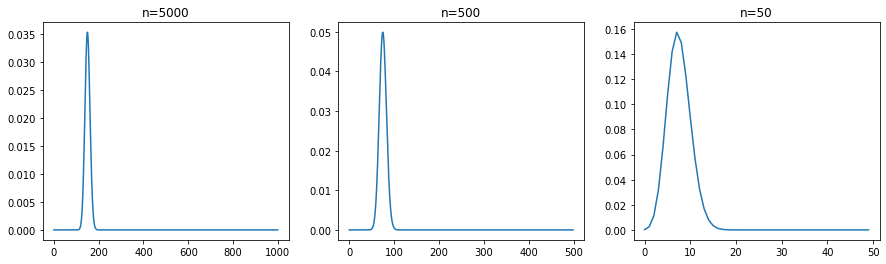

In [112]:
# Your code here
n = 50
p = 0.15
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
x= np.arange(n)
rv = binom(n, p)
ax3.set_title('n=50')
ax3.plot(x,rv.pmf(x))
n = 500
x= np.arange(n)
rv = binom(n, p)
ax2.set_title('n=500')
ax2.plot(x,rv.pmf(x))
n = 1000
x= np.arange(n)
rv = binom(n, p)
ax1.set_title('n=5000')
ax1.plot(x,rv.pmf(x))

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
# Según aumenta el tamaño de la muestra hay aumenta la probabilidad de que clique más gente al mismo tiempo.
# Para n = 50 hay unan prob de 0.15 de que 8 de las 50 hayan clickado

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Es una distribución de probabilidad que usaremos cuando el tamaño muestral sea pequeño o que la probabilidad
# del suceso sea muy pequeño

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [138]:
mu = 300
poisson.pmf(320, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [139]:
poisson.pmf(60, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

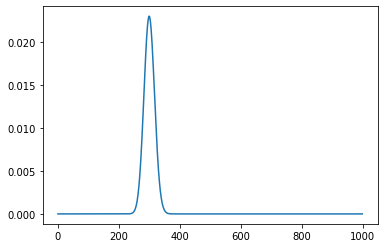

In [140]:
x = range(1000)
plt.plot(x,poisson.pmf(x, mu))
